***Prodromal Questionnaire - Brief Version (PQ-B) (Loewy et al., 2011)***

Total scores were calculated through a sum of all 21 items with “I have not experienced this' ' = 0 and any responses from “strongly disagree” to “strongly agree” = 1. Distress scores were calculated through a sum of all 21 items with “I have not experienced this” = 0, “strongly disagree” = 1, “disagree” = 2, “neutral” = 3, “agree” = 4, “strongly agree” = 5

*If you have experienced any of the following in the past month, please indicate the extent to which each experience made you feel frightened, concerned, or caused problems for you ("strongly disagree" — "strongly agree"). Do not include experiences that occur only while under the influence of alcohol, drugs or medications that were not prescribed to you.*


***Stereotypes of Schizophrenia Scale (Angermeyer & Matschinger, 2004)***

The scores were calculated by finding the average score of all items, as well as the average scores for the five individual subscales.

Subscales:
Factor 1 (Dangerousness) includes items 1 through 7. Item 7 is reverse-coded.
Factor 2 (Attribution of responsibility) includes items 8 through 13.
Factor 3 (Creativity) includes items 14 through 17.
Factor 4 (Unpredictability / Incompetence) incudes items 18 through 23.
Factor 5 (Poor prognosis) includes questions 24 through 27. Items 24 and 25 are reverse-coded. 


*Please indicate to which degree you agree with the following statements.*

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [332]:
df = pd.read_csv('data/thesis_data_cleaned_condensed.csv')
df.head()

,mTurkCode,simple_ID,mturk_ID,IP_COUNTRY,IP_STATE,Sex,Age,Income,Ethnicity,BORN_COUNTRY,...,PQB_12,PQB_13,PQB_14,PQB_15,PQB_16,PQB_17,PQB_18,PQB_19,PQB_20,PQB_21
0,26998,1,A8WLCSZLNZ8BL,India,Maharashtra,Male,32,"$30,000 to $39,999",Asian,India,...,4.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,4.0
1,80076,2,A2OM8OFBA92CNV,India,Maharashtra,Male,36,"Less than $10,000",Asian,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,86388,3,A1QBNCOUHYMST5,United States,Massachusetts,Female,68,"$30,000 to $39,999",White,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78717,4,A2J18K5IUQ2K4G,United States,New York,Male,31,"$60,000 to $69,999",White,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,97517,5,A3JVAEYFE3XGQM,United States,New York,Female,24,"$70,000 to $79,999",White,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
df.columns

Index(['mTurkCode', 'simple_ID', 'mturk_ID', 'IP_COUNTRY', 'IP_STATE', 'Sex',
       'Age', 'Income', 'Ethnicity', 'BORN_COUNTRY',
       ...
       'PQB_12', 'PQB_13', 'PQB_14', 'PQB_15', 'PQB_16', 'PQB_17', 'PQB_18',
       'PQB_19', 'PQB_20', 'PQB_21'],
      dtype='object', length=143)

In [334]:
df.isnull().sum()

mTurkCode       0
simple_ID       0
mturk_ID       77
IP_COUNTRY      0
IP_STATE        0
             ... 
PQB_17        622
PQB_18        622
PQB_19        622
PQB_20        622
PQB_21        622
Length: 143, dtype: int64

In [335]:
df_numeric = df.select_dtypes(include='number')
df_numeric.dropna(inplace= True)
df_numeric = df_numeric.astype(int)
df_numeric

,mTurkCode,simple_ID,Age,SubUse1,SubUse2,SubUse3,SubUse4,SubUse5,SubUse6,SubUse7,...,PQB_12,PQB_13,PQB_14,PQB_15,PQB_16,PQB_17,PQB_18,PQB_19,PQB_20,PQB_21
0,26998,1,32,2,1,1,1,1,1,1,...,4,5,5,4,4,5,4,5,4,4
6,27316,7,37,1,2,1,2,1,2,1,...,6,6,3,6,4,6,4,5,6,5
7,82748,8,28,1,2,2,1,1,1,2,...,4,3,4,4,3,3,4,4,3,3
14,58974,15,26,1,1,1,1,1,1,1,...,6,6,5,5,7,6,7,6,4,7
17,73141,18,30,1,2,2,1,1,2,2,...,5,5,6,6,5,4,4,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,77637,826,31,2,2,2,1,1,1,1,...,6,6,6,3,3,6,4,2,2,2
818,84721,827,27,1,2,1,1,1,1,2,...,3,2,3,3,2,2,5,2,2,4
819,86637,828,24,2,2,2,2,2,2,1,...,2,2,2,2,2,2,6,2,2,2
820,87089,829,43,2,2,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2


In [336]:
new_df = df[df['simple_ID'].isin(df_numeric['simple_ID'])].drop(df_numeric.columns, axis=1)
merged = pd.merge(new_df, df_numeric, left_index = True, right_index = True)
merged.reset_index(inplace = True)
merged.head()

,index,mturk_ID,IP_COUNTRY,IP_STATE,Sex,Income,Ethnicity,BORN_COUNTRY,BORN_STATE,GROW_COUNTRY,...,PQB_12,PQB_13,PQB_14,PQB_15,PQB_16,PQB_17,PQB_18,PQB_19,PQB_20,PQB_21
0,0,A8WLCSZLNZ8BL,India,Maharashtra,Male,"$30,000 to $39,999",Asian,India,Maharashtra,India,...,4,5,5,4,4,5,4,5,4,4
1,6,A111ZFNLXK1TCO,India,Tamil Nadu,Male,"$40,000 to $49,999",Asian,India,Tamil Nadu,India,...,6,6,3,6,4,6,4,5,6,5
2,7,A1EK8YNHZHTW1J,India,Tamil Nadu,Male,"$20,000 to $29,999",Asian,India,"TIRUPPUR, TAMIL NADU",India,...,4,3,4,4,3,3,4,4,3,3
3,14,AFUUPNBIKHRFZ,India,Tamil Nadu,Female,"$20,000 to $29,999",Asian,India,TAMIL NADU,India,...,6,6,5,5,7,6,7,6,4,7
4,17,A8NFLCEXUSFDM,India,Tamil Nadu,Male,"$10,000 to $19,999",Asian,India,tamilnadu,India,...,5,5,6,6,5,4,4,5,6,5


In [337]:
merged.rename(columns={'IP_COUNTRY': 'Country', 'IP_STATE': 'State'}, inplace=True)

In [338]:
merged['Country'].unique()

array(['India', 'United States', 'Italy', 'Brazil', 'United States '],
      dtype=object)

In [339]:
merged['Country'] = merged['Country'].str.replace('s ', 's')
merged['Country'].value_counts()

Country
India            60
Italy            57
Brazil           43
United States    40
Name: count, dtype: int64

In [340]:
merged['Income'].unique()

array(['$30,000 to $39,999', '$40,000 to $49,999', '$20,000 to $29,999',
       '$10,000 to $19,999', '$50,000 to $59,999', 'Less than $10,000',
       '$60,000 to $69,999', '$90,000 to $99,999', '$70,000 to $79,999',
       '$80,000 to $89,999', '$100,000 to $149,999', '$150,000 or more'],
      dtype=object)

In [341]:
merged['Income'] = merged['Income'].str.replace("to", "-")
#merged['Income'] = merged['Income'].str.replace("Less than", "<")
#merged['Income'] = merged['Income'].str.replace("150,000 or more", ">= $150,000")
merged['Income'] = merged['Income'].str.replace("$", "")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '30,000 - 39,999'),
  Text(1, 0, '40,000 - 49,999'),
  Text(2, 0, '20,000 - 29,999'),
  Text(3, 0, '10,000 - 19,999'),
  Text(4, 0, '50,000 - 59,999'),
  Text(5, 0, 'Less than 10,000'),
  Text(6, 0, '60,000 - 69,999'),
  Text(7, 0, '90,000 - 99,999'),
  Text(8, 0, '70,000 - 79,999'),
  Text(9, 0, '80,000 - 89,999'),
  Text(10, 0, '100,000 - 149,999'),
  Text(11, 0, '150,000 or more')])

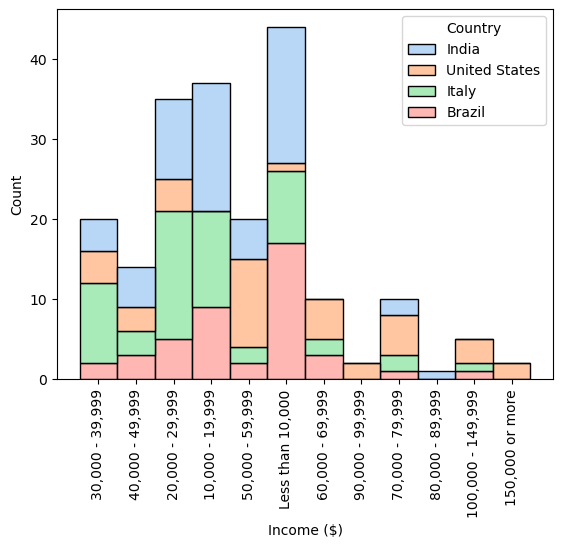

In [342]:
sns.histplot(data = merged, x = 'Income', 
             hue='Country', 
             multiple='stack', 
             palette='pastel')
plt.xlabel('Income ($)')
plt.xticks(rotation = 90)
#plt.legend(title = 'Country', labels=merged['IP_COUNTRY'].unique())

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Asian'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Black or African American'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'American Indian or Alaska Native'),
  Text(5, 0, 'White,Asian'),
  Text(6, 0, 'White,Black or African American,American Indian or Alaska Native')])

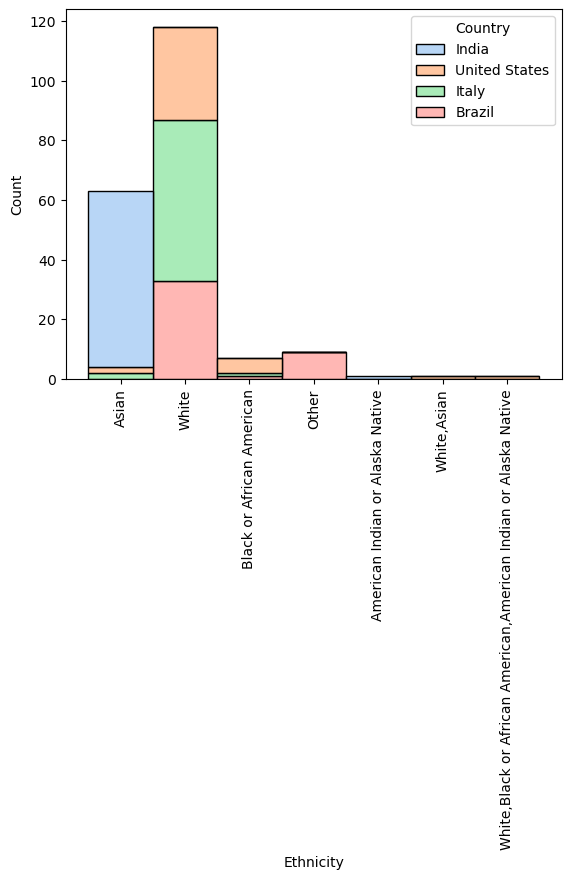

In [343]:
sns.histplot(data = merged, x = 'Ethnicity', 
             hue='Country', 
             multiple='stack', 
             palette='pastel')
plt.xticks(rotation = 90)

([0, 1], [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

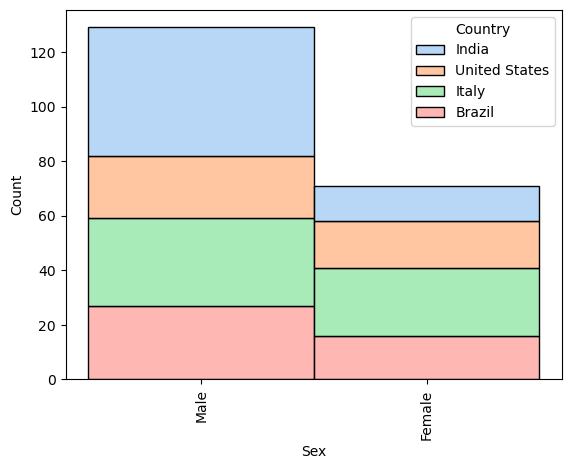

In [344]:
sns.histplot(data = merged, x = 'Sex', 
             hue='Country', 
             multiple='stack', 
             palette='pastel')
plt.xticks(rotation = 90)

In [345]:
merged['Country'].value_counts()

Country
India            60
Italy            57
Brazil           43
United States    40
Name: count, dtype: int64

In [346]:
merged['BORN_COUNTRY'].value_counts()

BORN_COUNTRY
India                                        61
Italy                                        48
Brazil                                       43
United States of America                     38
Romania                                       2
Russian Federation                            1
Kenya                                         1
Thailand                                      1
The former Yugoslav Republic of Macedonia     1
Albania                                       1
Mexico                                        1
Jamaica                                       1
Greece                                        1
Name: count, dtype: int64

In [365]:
def is_immigrant(row):
    if row['Country'] != row['BORN_COUNTRY']:
        return 1
    else:
        return 0

merged['Immigrant'] = merged.apply(is_immigrant, axis=1)
merged['Immigrant']

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: Immigrant, Length: 200, dtype: int64

PQB scores are all 2 points higher because of how they were transferred from MTurk.

In [348]:
pqb_cols = merged.columns[merged.columns.get_loc('PQB_1'):merged.columns.get_loc('PQB_21') + 1]
merged[pqb_cols] = merged[pqb_cols] - 2

`Calculating PQB distress and total scores`

In [349]:
merged['PQB_Distress'] = merged[pqb_cols].sum(axis = 1)

In [350]:
mask = (merged[pqb_cols] > 0).astype(int)
merged['PQB_Total'] = np.sum(mask, axis=1)
merged['PQB_Total']

0      21
1      21
2      21
3      21
4      21
       ..
195    18
196     9
197     3
198     1
199     7
Name: PQB_Total, Length: 200, dtype: int64

`Reversing the scores of some SCHIZ items`

In [351]:
reverse = {1:5, 2:4, 3:3, 4:2, 5:1}
cols_to_map = ['SCHIZ_7', 'SCHIZ_24', 'SCHIZ_25']
merged.loc[:, cols_to_map] = merged[cols_to_map].replace(reverse)
merged[cols_to_map]

,SCHIZ_7,SCHIZ_24,SCHIZ_25
0,3,2,3
1,2,2,4
2,2,3,4
3,4,2,3
4,2,3,2
...,...,...,...
195,2,3,3
196,3,3,3
197,1,4,4
198,2,4,5


In [352]:
schiz_cols = merged.columns[merged.columns.get_loc('SCHIZ_1'):merged.columns.get_loc('SCHIZ_27') + 1]
SCHIZ_F1 = merged.columns[merged.columns.get_loc('SCHIZ_1'):merged.columns.get_loc('SCHIZ_8')]
SCHIZ_F2 = merged.columns[merged.columns.get_loc('SCHIZ_8'):merged.columns.get_loc('SCHIZ_14')]
SCHIZ_F3 = merged.columns[merged.columns.get_loc('SCHIZ_14'):merged.columns.get_loc('SCHIZ_18')]
SCHIZ_F4 = merged.columns[merged.columns.get_loc('SCHIZ_18'):merged.columns.get_loc('SCHIZ_24')]
SCHIZ_F5 = merged.columns[merged.columns.get_loc('SCHIZ_24'):merged.columns.get_loc('SCHIZ_27') + 1]

In [356]:
merged['SCHIZ_Avg'] = merged[schiz_cols].mean(axis = 1)
merged['SCHIZ_F1_Avg'] = merged[SCHIZ_F1].mean(axis = 1)
merged['SCHIZ_F2_Avg'] = merged[SCHIZ_F2].mean(axis = 1)
merged['SCHIZ_F3_Avg'] = merged[SCHIZ_F3].mean(axis = 1)
merged['SCHIZ_F4_Avg'] = merged[SCHIZ_F4].mean(axis = 1)
merged['SCHIZ_F5_Avg'] = merged[SCHIZ_F5].mean(axis = 1)

`Only looking at substance use items focusing on frequency based on the original questionnaire`

In [359]:
sub_use_cols = merged.columns[merged.columns.get_loc('SubUse11'):merged.columns.get_loc('SubUse50') + 1]
merged['SubUse_Avg'] = merged[sub_use_cols].mean(axis=1)

In [363]:
merged['TobaccoUse_Avg'] = merged[['SubUse11', 'SubUse21', 'SubUse31', 'SubUse41']].mean(axis=1)
merged['AlcUse_Avg'] = merged[['SubUse12', 'SubUse22', 'SubUse32', 'SubUse42']].mean(axis=1)
merged['CannUse_Avg'] = merged[['SubUse13', 'SubUse23', 'SubUse33', 'SubUse43']].mean(axis=1)
merged['CocaineUse_Avg'] = merged[['SubUse14', 'SubUse24', 'SubUse34', 'SubUse44']].mean(axis=1)
merged['AmphUse_Avg'] = merged[['SubUse15', 'SubUse25', 'SubUse35', 'SubUse45']].mean(axis=1)
merged['InhaleUse_Avg'] = merged[['SubUse16', 'SubUse26', 'SubUse36', 'SubUse46']].mean(axis=1)
merged['SedUse_Avg'] = merged[['SubUse17', 'SubUse27', 'SubUse37', 'SubUse47']].mean(axis=1)
merged['HallucUse_Avg'] = merged[['SubUse18', 'SubUse28', 'SubUse38', 'SubUse48']].mean(axis=1)
merged['OpioidUse_Avg'] = merged[['SubUse19', 'SubUse29', 'SubUse39', 'SubUse49']].mean(axis=1)
merged['OtherUse_Avg'] = merged[['SubUse20', 'SubUse30', 'SubUse40', 'SubUse50']].mean(axis=1)

In [366]:
merged['Sex_Num'] = merged['Sex'].replace({'Male': 1, 'Female': 2})

In [374]:
income_mapping = {
    'Less than 10,000': 1,
    '10,000 - 19,999': 2,
    '20,000 - 29,999': 3,
    '30,000 - 39,999': 4,
    '40,000 - 49,999': 5,
    '50,000 - 59,999': 6,
    '60,000 - 69,999': 7,
    '70,000 - 79,999': 8,
    '80,000 - 89,999': 9,
    '90,000 - 99,999': 10,
    '100,000 - 149,999': 11,
    '150,000 or more': 12
}

merged['Income_Num'] = merged['Income'].map(income_mapping)

In [388]:
variables = ['Age', 
             'Income_Num',
             'PQB_Distress',
             'PQB_Total',
             'SCHIZ_Avg',
             'SCHIZ_F1_Avg',
             'SCHIZ_F2_Avg',
             'SCHIZ_F3_Avg',
             'SCHIZ_F4_Avg',
             'SCHIZ_F5_Avg',
             'SubUse_Avg',
             'TobaccoUse_Avg', 
             'AlcUse_Avg', 
             'CannUse_Avg', 
             'CocaineUse_Avg', 
             'AmphUse_Avg', 
             'InhaleUse_Avg', 
             'SedUse_Avg',
             'HallucUse_Avg', 
             'OpioidUse_Avg', 
             'OtherUse_Avg']

corr = merged[variables].corr()
corr

,Age,Income_Num,PQB_Distress,PQB_Total,SCHIZ_Avg,SCHIZ_F1_Avg,SCHIZ_F2_Avg,SCHIZ_F3_Avg,SCHIZ_F4_Avg,SCHIZ_F5_Avg,...,TobaccoUse_Avg,AlcUse_Avg,CannUse_Avg,CocaineUse_Avg,AmphUse_Avg,InhaleUse_Avg,SedUse_Avg,HallucUse_Avg,OpioidUse_Avg,OtherUse_Avg
Age,1.000000,0.184976,-0.225215,-0.227907,-0.103188,-0.089894,-0.118208,-0.076401,0.030751,-0.156799,...,-0.054123,-0.100686,-0.110966,-0.156061,-0.146205,-0.135623,-0.118049,-0.137563,-0.114770,-0.127525
Income_Num,0.184976,1.000000,-0.192444,-0.215335,-0.176101,-0.108432,-0.254571,-0.038411,-0.118870,-0.033354,...,-0.174526,-0.085992,-0.117073,-0.076425,-0.088208,-0.096654,-0.124084,-0.093125,-0.084344,-0.107634
PQB_Distress,-0.225215,-0.192444,1.000000,0.903883,0.567478,0.483892,0.632525,0.369875,0.255742,0.174127,...,0.255477,0.276358,0.306868,0.381516,0.342934,0.357534,0.365077,0.353830,0.351687,0.347216
PQB_Total,-0.227907,-0.215335,0.903883,1.000000,0.552965,0.470848,0.646445,0.330675,0.230778,0.173494,...,0.276257,0.251400,0.291197,0.397764,0.314481,0.341519,0.339124,0.341462,0.332993,0.340227
SCHIZ_Avg,-0.103188,-0.176101,0.567478,0.552965,1.000000,0.894087,0.852458,0.501109,0.742206,0.462412,...,0.245325,0.163509,0.299739,0.368569,0.338541,0.350393,0.328545,0.337261,0.331255,0.325897
SCHIZ_F1_Avg,-0.089894,-0.108432,0.483892,0.470848,0.894087,1.000000,0.733357,0.282268,0.589391,0.375891,...,0.153992,0.096562,0.197290,0.276902,0.248513,0.266025,0.227866,0.251525,0.252600,0.245699
SCHIZ_F2_Avg,-0.118208,-0.254571,0.632525,0.646445,0.852458,0.733357,1.000000,0.348250,0.434943,0.295805,...,0.272115,0.218442,0.315523,0.408819,0.354810,0.372499,0.349176,0.358972,0.358515,0.353540
SCHIZ_F3_Avg,-0.076401,-0.038411,0.369875,0.330675,0.501109,0.282268,0.348250,1.000000,0.277141,0.025464,...,0.201683,0.107695,0.263146,0.251529,0.233687,0.232813,0.191400,0.203360,0.233099,0.239008
SCHIZ_F4_Avg,0.030751,-0.118870,0.255742,0.230778,0.742206,0.589391,0.434943,0.277141,1.000000,0.236936,...,0.138985,0.034853,0.120039,0.135524,0.150373,0.137624,0.187069,0.149326,0.119075,0.121034
SCHIZ_F5_Avg,-0.156799,-0.033354,0.174127,0.173494,0.462412,0.375891,0.295805,0.025464,0.236936,1.000000,...,0.096957,0.136255,0.212019,0.247949,0.236812,0.258678,0.214847,0.252325,0.231641,0.212573


<Axes: >

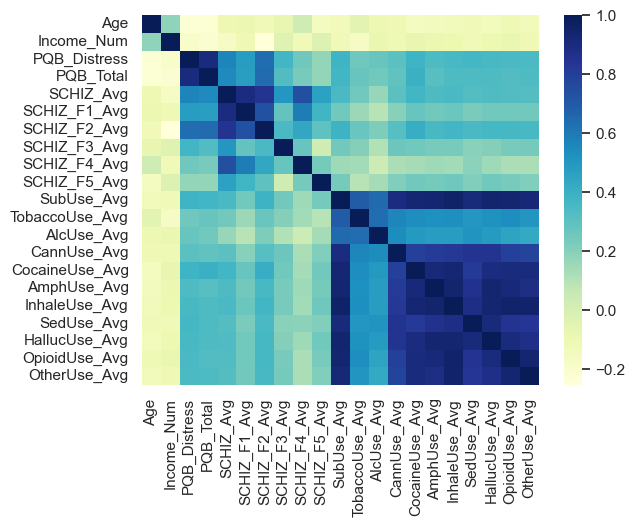

In [389]:
sns.heatmap(data = merged[variables].corr(), cmap = "YlGnBu")

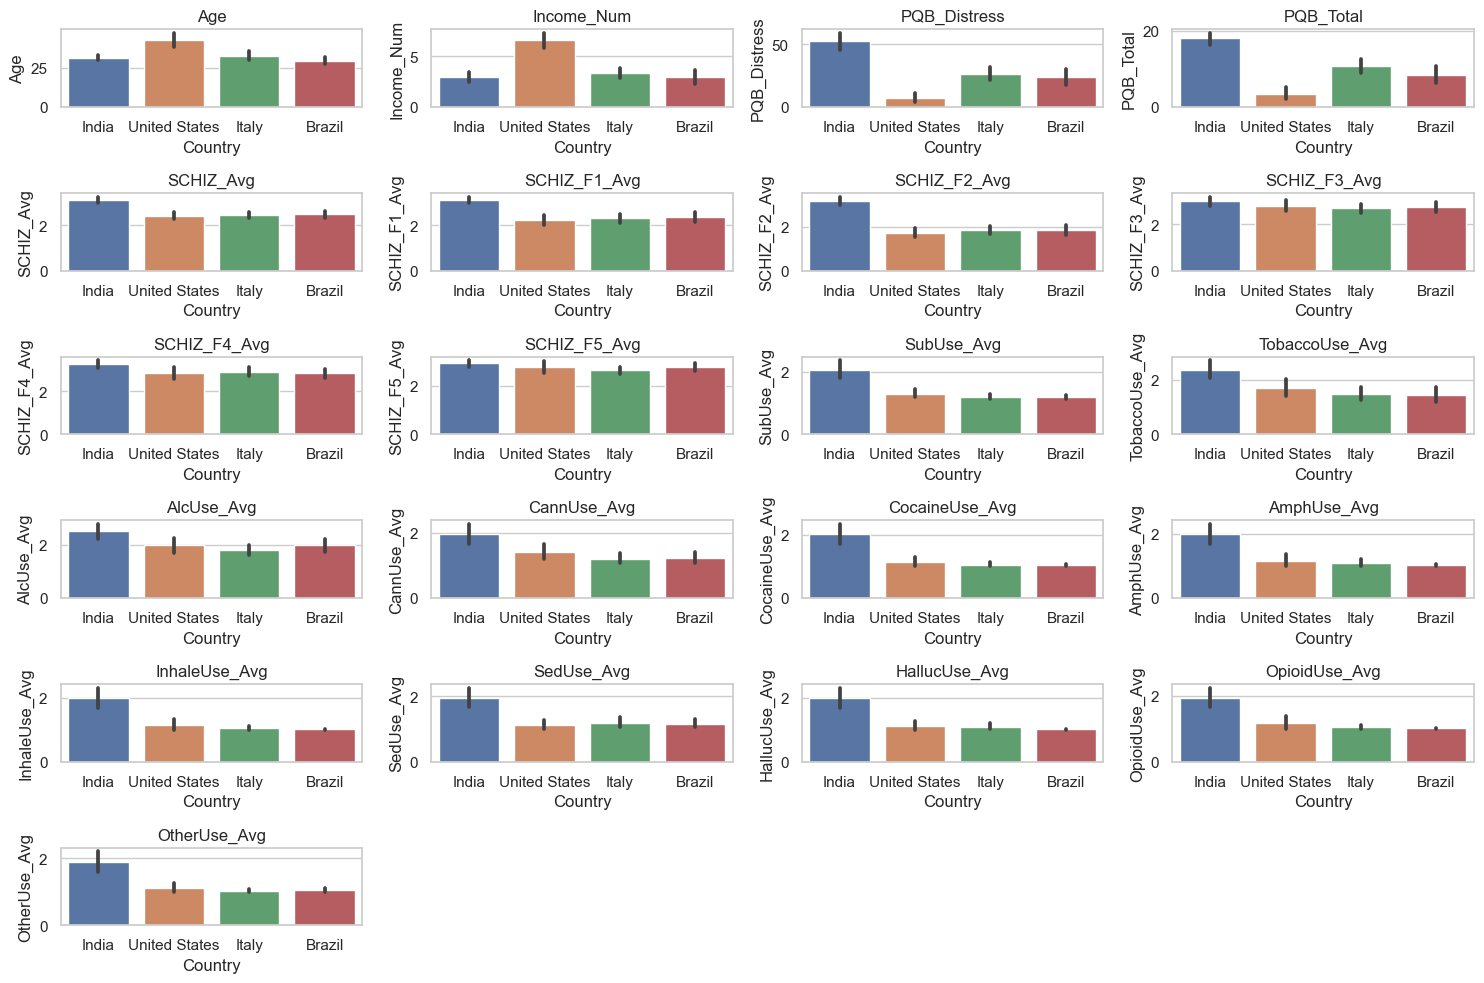

In [391]:
plt.figure(figsize=(15, 10))

#looping through each variable
for i, variable in enumerate(variables, 1):
    plt.subplot(6, 4, i) #adjusting number of plots in each row/column
    sns.barplot(x='Country', y=variable, data=merged)
    plt.title(variable)

plt.tight_layout()
plt.show()

In [400]:
grouped_by_country = merged.groupby('Country')

country_dfs = {}
for country, group in grouped_by_country:
    country_dfs[country] = group 

# Access individual DataFrames using the country name
df_India = country_dfs['India']
df_Italy = country_dfs['Italy']
df_Brazil = country_dfs['Brazil']
df_US = country_dfs['United States']

In [403]:
df_India[variables].corr()

,Age,Income_Num,PQB_Distress,PQB_Total,SCHIZ_Avg,SCHIZ_F1_Avg,SCHIZ_F2_Avg,SCHIZ_F3_Avg,SCHIZ_F4_Avg,SCHIZ_F5_Avg,...,TobaccoUse_Avg,AlcUse_Avg,CannUse_Avg,CocaineUse_Avg,AmphUse_Avg,InhaleUse_Avg,SedUse_Avg,HallucUse_Avg,OpioidUse_Avg,OtherUse_Avg
Age,1.000000,-0.285436,-0.256174,-0.272152,-0.016416,-0.027868,-0.059639,-0.131989,0.350038,-0.383217,...,0.072492,-0.117460,-0.163505,-0.215059,-0.175129,-0.171415,-0.196403,-0.191662,-0.176046,-0.164483
Income_Num,-0.285436,1.000000,0.098472,0.099456,-0.089874,0.010991,-0.136193,0.015143,-0.169966,-0.058543,...,-0.061626,-0.166468,-0.065054,0.101584,0.026104,-0.027297,-0.030347,0.037114,-0.020790,-0.036349
PQB_Distress,-0.256174,0.098472,1.000000,0.811637,0.543806,0.529149,0.539726,0.566002,0.214259,0.264265,...,0.223096,0.365270,0.272077,0.258469,0.290129,0.261938,0.303436,0.258421,0.261242,0.218664
PQB_Total,-0.272152,0.099456,0.811637,1.000000,0.362077,0.350181,0.381952,0.475502,0.028165,0.193713,...,0.348524,0.389359,0.348681,0.362678,0.344248,0.338578,0.352539,0.348083,0.332979,0.313638
SCHIZ_Avg,-0.016416,-0.089874,0.543806,0.362077,1.000000,0.904854,0.887539,0.777098,0.782853,0.521041,...,0.125930,0.172160,0.277973,0.224064,0.293002,0.259150,0.307457,0.239267,0.262890,0.228754
SCHIZ_F1_Avg,-0.027868,0.010991,0.529149,0.350181,0.904854,1.000000,0.821148,0.575313,0.649784,0.386800,...,0.134183,0.133599,0.204593,0.181598,0.243694,0.209210,0.212805,0.176144,0.214447,0.194736
SCHIZ_F2_Avg,-0.059639,-0.136193,0.539726,0.381952,0.887539,0.821148,1.000000,0.587490,0.572123,0.378313,...,0.042456,0.159688,0.188025,0.134318,0.199051,0.162162,0.224637,0.148848,0.173796,0.143037
SCHIZ_F3_Avg,-0.131989,0.015143,0.566002,0.475502,0.777098,0.575313,0.587490,1.000000,0.518771,0.416081,...,0.209691,0.253202,0.374276,0.348002,0.395117,0.368676,0.399312,0.330311,0.366321,0.344439
SCHIZ_F4_Avg,0.350038,-0.169966,0.214259,0.028165,0.782853,0.649784,0.572123,0.518771,1.000000,0.191476,...,0.046432,-0.012731,0.071424,-0.002246,0.086049,0.036188,0.094494,0.044839,0.044539,0.010713
SCHIZ_F5_Avg,-0.383217,-0.058543,0.264265,0.193713,0.521041,0.386800,0.378313,0.416081,0.191476,1.000000,...,0.091633,0.208744,0.384815,0.352539,0.327482,0.375538,0.411695,0.376407,0.354739,0.321923


<Axes: >

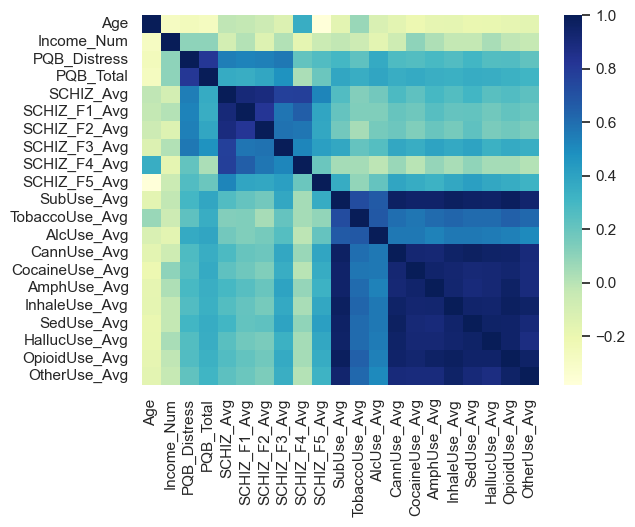

In [402]:
sns.heatmap(data = df_India[variables].corr(), cmap = "YlGnBu")

***Linear regression***

In [410]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

X = df_India[variables] 
y = df_India['PQB_Distress']
lr = LinearRegression()
lr.fit(X,y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f"Train R2 Score: {r2_score(y_train, y_train_pred)}")
print("Test R2 Score:", r2_score(y_test, y_test_pred))

print(f"Train RMSE: {mean_squared_error(y_train, y_train_pred, squared=False)}")
print(f"Test RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}")

mean_r2 = cross_val_score(lr, X, y, scoring='r2', cv=5).mean()
print("Mean R-squared value across five folds:", mean_r2)

Train R2 Score: 1.0
Test R2 Score: 1.0
Train RMSE: 2.1710467311173995e-14
Test RMSE: 1.3104132565528851e-14
Mean R-squared value across five folds: 1.0


In [406]:
coefficients = lr.coef_
variable_names = X.columns

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Display the coefficients
print(coefficients_df)

          Variable   Coefficient
0              Age  1.018529e-16
1       Income_Num -4.996004e-15
2     PQB_Distress  1.000000e+00
3        PQB_Total -2.498002e-16
4        SCHIZ_Avg -5.811324e-17
5     SCHIZ_F1_Avg  1.314920e-15
6     SCHIZ_F2_Avg -7.606762e-16
7     SCHIZ_F3_Avg -1.377370e-15
8     SCHIZ_F4_Avg -1.422473e-16
9     SCHIZ_F5_Avg -2.081668e-17
10      SubUse_Avg  1.734723e-17
11  TobaccoUse_Avg  5.377643e-16
12      AlcUse_Avg -8.291978e-16
13     CannUse_Avg  1.262879e-15
14  CocaineUse_Avg  9.436896e-16
15     AmphUse_Avg  2.029626e-15
16   InhaleUse_Avg  3.781697e-16
17      SedUse_Avg  1.200429e-15
18   HallucUse_Avg -2.636780e-15
19   OpioidUse_Avg -3.049644e-15
20    OtherUse_Avg  4.128642e-16


In [411]:
r2_values = []

for variable in variables:
    # Exclude the current variable
    X_subset = X.drop(columns=[variable])
    
    # Calculate R-squared using cross_val_score
    r2 = cross_val_score(lr, X_subset, y, scoring='r2', cv=5).mean()
    
    # Append the R-squared value to the list
    r2_values.append(r2)

# Create a DataFrame to display R-squared values for each variable
r2_df = pd.DataFrame({'Variable': variables, 'Mean R-squared': r2_values})

# Display the DataFrame
print(r2_df)

          Variable  Mean R-squared
0              Age        1.000000
1       Income_Num        1.000000
2     PQB_Distress        0.516303
3        PQB_Total        1.000000
4        SCHIZ_Avg        1.000000
5     SCHIZ_F1_Avg        1.000000
6     SCHIZ_F2_Avg        1.000000
7     SCHIZ_F3_Avg        1.000000
8     SCHIZ_F4_Avg        1.000000
9     SCHIZ_F5_Avg        1.000000
10      SubUse_Avg        1.000000
11  TobaccoUse_Avg        1.000000
12      AlcUse_Avg        1.000000
13     CannUse_Avg        1.000000
14  CocaineUse_Avg        1.000000
15     AmphUse_Avg        1.000000
16   InhaleUse_Avg        1.000000
17      SedUse_Avg        1.000000
18   HallucUse_Avg        1.000000
19   OpioidUse_Avg        1.000000
20    OtherUse_Avg        1.000000
